In this work we will predict Heart Disease using Machine Learning models .The daset used in this workflow is avaliable at Kaggle website. 
The current language program is python 3. 

Here we will be experimenting with 2 models algorithms

KNeighborsClassifier

RandomForestClassifier

In [11]:
#Importing the necessaries libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the necessaries models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# loading the data and taking a look
df = pd.read_csv(r"C:\Users\mclar\Downloads\heart.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Description of columns
age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [7]:
# Verifieng if there is any Missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Data exploration
We will make some visualizations to get some insights about the data.

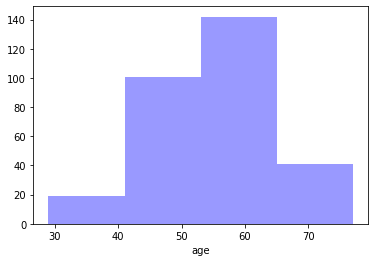

In [13]:
sns.distplot(df["age"], bins=4, kde=False, color='blue')

###### Approximately, 60% of the people are in the range of 41-65.

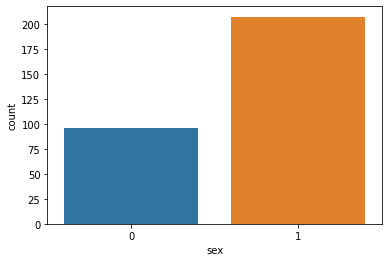

In [14]:
sns.countplot(df["sex"])

More than 2/3 of the population in the dataset are male

In [16]:
total = len(df["sex"])
males = df["sex"].sum()
females = len(df["sex"]) - males
print("Porcentage of males:", round(males/total*100, 4))
print("procentage of females:", round(females/total*100, 4))

Porcentage of males: 68.3168
procentage of females: 31.6832


Text(0, 0.5, 'amount')

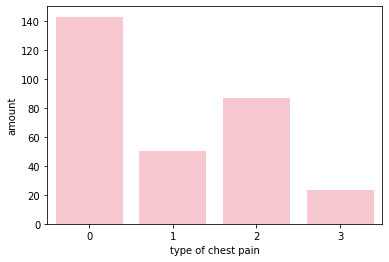

In [19]:
cp_graph = sns.countplot(df["cp"], color="pink")
cp_graph.set_xlabel("type of chest pain")
cp_graph.set_ylabel("amount")

Almost, half of the people are asymptomatic

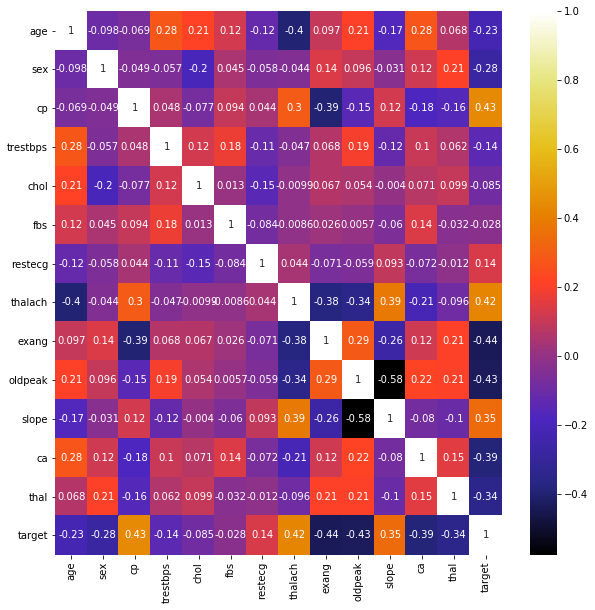

In [24]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="CMRmap")

Here a summary of the correlation of every pair of features. The ones that are more correlated with the target are cp, thalach and slop in that order. This is a good way to later select the most promising features for our final model, although there are other more sophisticated and automated ways to select the best features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBC645AA48>,
      dtype=object)

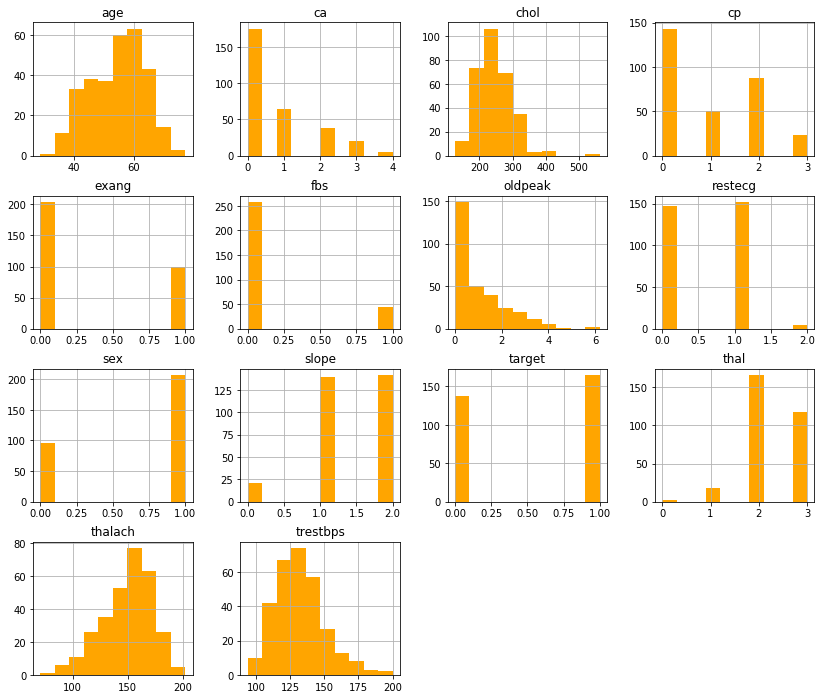

In [22]:
#An overview of all plots that we have in our dataset
df.hist(figsize=(14,12), color='orange' )

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

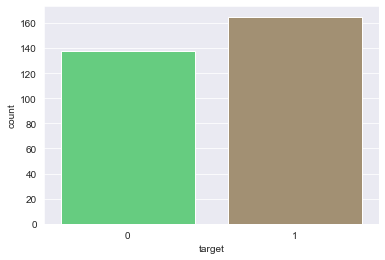

In [45]:
sns.set_style('darkgrid')
sns.countplot(x='target',data=df,palette='terrain')

## Machine learning

### Data Processing
After exploring the dataset, we observed that is needed to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [47]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [52]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


The next step is to separate the 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

We use standardScaler to Standardize features by removing the mean and scaling to unit variance

In [57]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


The next step is to split our data set into y and x values

In [58]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [86]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())
score

array([0.83870968, 0.80645161, 0.83870968, 0.93333333, 0.86666667,
       0.7       , 0.83333333, 0.86666667, 0.73333333, 0.83333333])

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

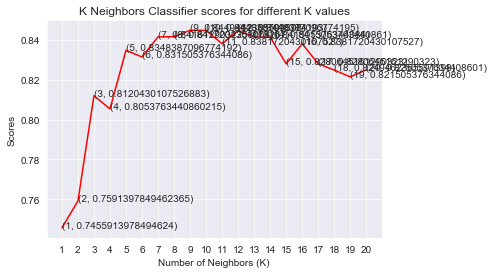

In [78]:
plt.plot( [k for k in range(1, 21)], knn_scores, color = 'red' )

for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = k)
score=cross_val_score(knn_classifier,X,y,cv=10)
knn_scores.append(score.mean())

In [87]:
knn_scores

[0.7455913978494624,
 0.7591397849462365,
 0.8120430107526883,
 0.8053763440860215,
 0.8348387096774192,
 0.831505376344086,
 0.8416129032258064,
 0.8417204301075267,
 0.8449462365591398,
 0.8448387096774193,
 0.8381720430107527,
 0.8448387096774195,
 0.841505376344086,
 0.8415053763440861,
 0.8280645161290323,
 0.8381720430107527,
 0.8280645161290323,
 0.8249462365591398,
 0.821505376344086,
 0.8250537634408601]

In [79]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [81]:
score.mean()

0.8448387096774195

### Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:

randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [84]:
score.mean()

0.798709677419355

### between the  two models the KNeighborsClassifier had a better performance.